In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor

In [2]:
def train_nn(dataloader, model, loss_fn, optimizer):
    model.train()
    for (X, y) in dataloader:
        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

def test_nn(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    
def epoch_train_nn(n_epochs, train_dataloader, test_dataloader, model, loss_fn, optimizer):
    for t in range(n_epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train_nn(train_dataloader, model, loss_fn, optimizer)
        test_nn(test_dataloader, model, loss_fn)
    print("Done!")

In [3]:
from neural_network import NeuralNetwork

model = NeuralNetwork()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.003)

0 torch.Size([1, 28, 28]) 0
1 torch.Size([1, 28, 28]) 0
2 torch.Size([1, 28, 28]) 0
3 torch.Size([1, 28, 28]) 0


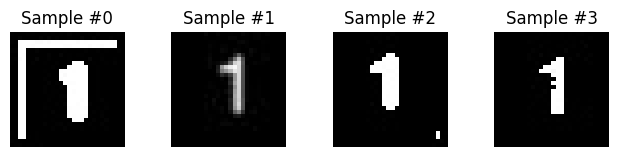

In [4]:
from dataset import TrainDataset, TestDataset

train_dataset = TrainDataset(transform=ToTensor())
test_dataset = TestDataset(transform=ToTensor())
fig = plt.figure()

for i, (X, y) in enumerate(train_dataset):
    print(i, X.shape, y)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plt.imshow(X[0], cmap="gray", vmin=0, vmax=1)

    if i == 3:
        plt.show()
        break

In [5]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=True)
epoch_train_nn(10, train_dataloader, test_dataloader, model, loss_fn, optimizer)

Epoch 1
-------------------------------
Accuracy: 42.1%, Avg loss: 1.628032 

Epoch 2
-------------------------------
Accuracy: 68.3%, Avg loss: 0.891159 

Epoch 3
-------------------------------
Accuracy: 82.3%, Avg loss: 0.536894 

Epoch 4
-------------------------------
Accuracy: 88.5%, Avg loss: 0.391977 

Epoch 5
-------------------------------
Accuracy: 92.8%, Avg loss: 0.253173 

Epoch 6
-------------------------------
Accuracy: 94.2%, Avg loss: 0.210423 

Epoch 7
-------------------------------
Accuracy: 90.6%, Avg loss: 0.353778 

Epoch 8
-------------------------------
Accuracy: 91.7%, Avg loss: 0.304021 

Epoch 9
-------------------------------
Accuracy: 95.3%, Avg loss: 0.176507 

Epoch 10
-------------------------------
Accuracy: 95.9%, Avg loss: 0.169273 

Done!


In [6]:
torch.save(model.state_dict(), "model_file.pt")